In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib 
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import pyiast
plt.matplotlib.font_manager.fontManager.addfont("one_d_sensing/OpenSans-Regular.ttf")
plt.style.use("one_d_sensing/grandbudapest.mplstyle")
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import os
from sklearn import neighbors

import warnings
warnings.filterwarnings("ignore")
print("WARNING: you are turning off warnings!")

In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

# load in adsorption data
CO$_2$ and CH$_4$ adsorption in HKUST-1 and MOF-5 at 25 C

(source in .csv files)


In [2]:
mofs = ["HKUST-1", "IRMOF-1"]
gases = ["co2", "ch4"]
molecular_weight = {"ch4":16.04, "co2":44.01}
df = dict()
for mof in mofs:
    df[mof] = dict()
    for gas in gases:
        df[mof][gas] = pd.read_csv(os.path.join("adsorption_data", gas + "_" + mof + "_25C.csv"), skiprows = 1)
        if gas == "ch4":
            df[mof][gas]["N(mmol/g)"] = df[mof][gas]["N(cm3/g)"] / 22.4
        df[mof][gas]["N(g/g)"] = df[mof][gas]["N(mmol/g)"] * molecular_weight[gas] / 1000 

df["IRMOF-1"]["co2"]

,P(bar),N(mmol/g),N(g/g)
0,0.0,0.0,0.000000
1,1.2,1.1,0.048411
2,2.1,1.8,0.079218
3,3.2,2.8,0.123228
4,4.1,3.7,0.162837
5,5.3,4.9,0.215649
6,6.3,6.1,0.268461
7,7.2,7.1,0.312471
8,8.2,8.4,0.369684
9,9.4,10.1,0.444501


# Construct Adsorption Models
this is for `pyiast`

use interpolator isotherm for CO$_2$ in MOF-5 b/c of the inflection for which we do not have an analytical model.

note the IAST should be done on a mole basis.

In [3]:
gas_to_label = {"co2": "CO$_2$", "ch4": "CH$_4$"} # for latex
p_max_in_plot = {"co2": 50.0, "ch4": 100.0}
mof_to_color = {"IRMOF-1": "C0", "HKUST-1": "C3"}
gas_to_marker = {"co2": "s", "ch4": "o"}

In [4]:
ads_model = dict()
for mof in mofs:
    ads_model[mof] = dict()
    for gas in gases:
        if gas == "co2" and mof == "IRMOF-1":
            ads_model[mof][gas] = pyiast.InterpolatorIsotherm(df[mof][gas],
                                                              pressure_key="P(bar)",
                                                              loading_key="N(mmol/g)", 
                                                              fill_value=df[mof][gas]["N(mmol/g)"].max()) 
        else:
            ads_model[mof][gas] = pyiast.ModelIsotherm(df[mof][gas],
                                                       pressure_key="P(bar)",
                                                       loading_key="N(mmol/g)",
                                                       model="Langmuir")
      

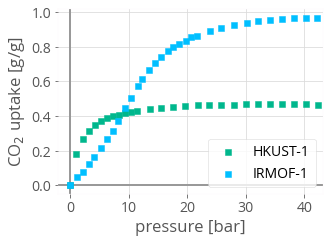

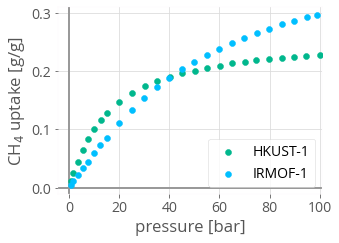

In [5]:
def draw_axes():
    plt.axvline(x=0, color="0.6", zorder=1)
    plt.axhline(y=0, color="0.6", zorder=1)

p_max = {"ch4": 101.0, "co2": 43.1}

for gas in gases:
    p = np.linspace(0.0, p_max[gas], 100)
    plt.figure(figsize=[6.4* 0.75, 4.8* 0.75])
    for mof in mofs:
        plt.scatter(df[mof][gas]["P(bar)"], df[mof][gas]["N(g/g)"], color=mof_to_color[mof], 
                    zorder=100, marker=gas_to_marker[gas], label=mof)
#         plt.plot(p, ads_model[mof][gas].loading(p) * molecular_weight[gas] / 1000, label=mof, color=mof_to_color[mof], zorder=100)
    draw_axes()
    plt.legend()
    plt.xlabel("pressure [bar]")
    plt.ylabel(gas_to_label[gas] + " uptake [g/g]")
    plt.tight_layout()
    plt.xlim(xmax=p_max[gas])
    plt.savefig(gas + "_adsorption_data.pdf", format="pdf") # in  mapping nb

In [6]:
ads_model["HKUST-1"]["co2"].params # e.g. get params

{'M': 11.258065222216736, 'K': 0.5719565569097571}

In [7]:
ads_model["HKUST-1"]["co2"].loading(0.2) # e.g. compute loading at 0.2 bar

1.155630729744193

# Adsorption model $\mathbf{m}=f(\mathbf{p})$

In [8]:
"""
    m = f(p)

return adsorbed mass in the MOFs as a function of pressure.

both m and p are arrays here.

note: we apply iast to the mmol/g adsorption values, then convert to g/g

m[i]: total mass adsorbed in MOF i
p[i]: partial pressure of gas i
"""
def f(p):
    if np.any(p < 0.0):
        # tell optim algo this is the wrong direction!
        return np.array([-1.0 * np.linalg.norm(p), -1.0 * np.linalg.norm(p)])
    m = np.zeros(2)
    for i, mof in enumerate(mofs):
        # if gas is pure gas 1
        if p[0] == 0.0:
            m[i] = ads_model[mof][gases[1]].loading(p[1]) * molecular_weight[gases[1]] / 1000
            continue
        #  if gas is pure gas 0
        if p[1] == 0.0:
            m[i] = ads_model[mof][gases[0]].loading(p[0]) * molecular_weight[gases[0]] / 1000
            continue
        # if reached this far, need IAST
        # first, a reasonable guess for adsorbed_mole_fraction_guess
        #  based on pure-component loadings
        m_guess = np.zeros(2)
        for g, gas in enumerate(gases):
            m_guess[g] = ads_model[mof][gas].loading(p[g])
        m_guess = m_guess / np.sum(m_guess)
        # component loadings in mof i.
        #  note that these are in mmol. so we need to use molecular weight to convert to g.
        q = pyiast.iast(p, [ads_model[mof][gas] for gas in gases],
                        verboseflag=False, adsorbed_mole_fraction_guess=m_guess, 
                        warningoff=True)
        for g, gas in enumerate(gases):
            m[i] += q[g] * molecular_weight[gas] / 1000
    return m # g/g
# turn warningoff=False to see if there are warnings.

In [9]:
p = np.array([-0.3, 0.5])
np.all(p <0)

False

In [10]:
p = np.array([5.0, 4.0])
m = f(p)
m

array([0.35548845, 0.23237337])

# Inverse of adsorption model $\mathbf{p}=g(\mathbf{m})$

## k-NN algo for good guess
forward function `f` is robust.

inverse function `g` is not... i.e. will not converge if the starting guess is not very close to the true solution.
so let's use nearest neighbors to get a good guess for the inverse function.

In [11]:
ps = np.concatenate((np.linspace(0, 5.0, 50), np.linspace(3.0, 30.0, 100)[2:]))
knn = neighbors.KNeighborsRegressor(1)
P = []
M = []
for i in range(len(ps)):
    for j in range(len(ps)):
        p = np.array([ps[i], ps[j]])
        P.append(p)
        M.append(f(p))
knn_model = knn.fit(M, P) # the inverse problem

def g_knn(m):
    return knn_model.predict([m])[0]

In [12]:
def distance_to_nearest_neighbor(m):
    return knn_model.kneighbors([m])[0][0][0]

In [13]:
g_knn(m)

array([5.        , 3.97959184])

In [14]:
"""
    p = g(m)

inverse of f(p). i.e. given m, return p that produces it.
if not a successful root finding, return Nans
"""
def g(m):
    def f_want_0(p):
        return f(p) - m
    p_guess = g_knn(m)
    xtol = 1.49012e-08 # default
    method = "hybr" # default
    if p_guess[0] < 4.0 or p_guess[1] < 4.0:
        method = "lm" # works better for small p, but slower
    sol = optimize.root(f_want_0, p_guess, method=method)
    p = sol.x
    if not sol.success:
        print(sol.message)
        return np.array([np.nan, np.nan])
    return p

In [15]:
g(m)

array([5., 4.])

# Bivariate Color Map

In [16]:
def colorFromBivariateData(x, y):
    if np.any(x > 1) or np.any(y > 1):
        raise Exception("Numbers must be between 0 and 1.")
    if np.any(np.isnan(x)) or np.any(np.isnan(y)):
        return np.array([1, 1, 1, 1])
    return (x, y, 1-(x+y)/2, 1.0)

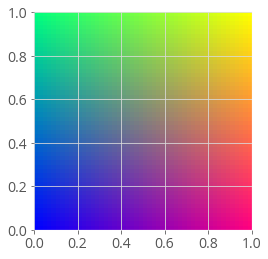

In [17]:
# Example of colorFromBivariateData function
x = np.linspace(0, 1)
y = np.linspace(0, 1)
z = [[colorFromBivariateData(x[i], y[j]) for i in range(np.size(x))] for j in range(np.size(y))]
extent = (0, 1, 0, 1) #figure out how to put our desired x/y lims on this
plt.imshow(z, extent=extent, origin='lower')

functions to draw grid lines

In [18]:
grid_line_color = "k"

# Function to draw boundary on response space

In [19]:
# Function to draw boundary around response space figure
kwargs = {"color": grid_line_color, "lw": 4, "clip_on": False, "zorder": 100}
def draw_mspace_boundaries(p_max, plt_num):
    x = np.linspace(0, p_max, 100)
    m1 = np.zeros(len(x))
    m2 = np.zeros(len(x))
    for i in range(len(x)):
        # make pa = 0
        p = np.array([0, x[i]])
        m1[i], m2[i] = f(p) 
    ax[plt_num].plot(m1, m2, **kwargs)
    for i in range(len(x)):        
        # make pb = 0
        p = np.array([x[i], 0])
        m1[i], m2[i] = f(p) 
    ax[plt_num].plot(m1, m2, **kwargs)
    for i in range(len(x)):        
        # make pa = max
        p = np.array([p_max, x[i]])
        m1[i], m2[i] = f(p) 
    ax[plt_num].plot(m1, m2, **kwargs)
    for i in range(len(x)):        
        # make pb = max
        p = np.array([x[i], p_max])
        m1[i], m2[i] = f(p) 
    ax[plt_num].plot(m1, m2, **kwargs)
    
def draw_box(L, plt_num):
    ax[plt_num].hlines(0.0, 0.0, L, **kwargs)
    ax[plt_num].hlines(L  , 0.0, L, **kwargs)
    ax[plt_num].vlines(0.0, 0.0, L, **kwargs)
    ax[plt_num].vlines(L  , 0.0, L, **kwargs)

In [20]:
# def f_test(x, y):
#     return x

# x = np.linspace(0, 2.0, 5)
# y = np.linspace(0.0, 10.0, 100)
# z = [[plt.cm.Greens(f_test(x_i, y_i)) for x_i in x] for y_i in y]
# plt.figure()
# extent = (0, 2.0, 0, 10.0)
# plt.imshow(z, extent=extent, origin='lower')

# composition $\rightarrow$ response space mapping by $f(\mathbf{p})$.
(forward problem) $f : \mathbf{p} \mapsto \mathbf{m}$

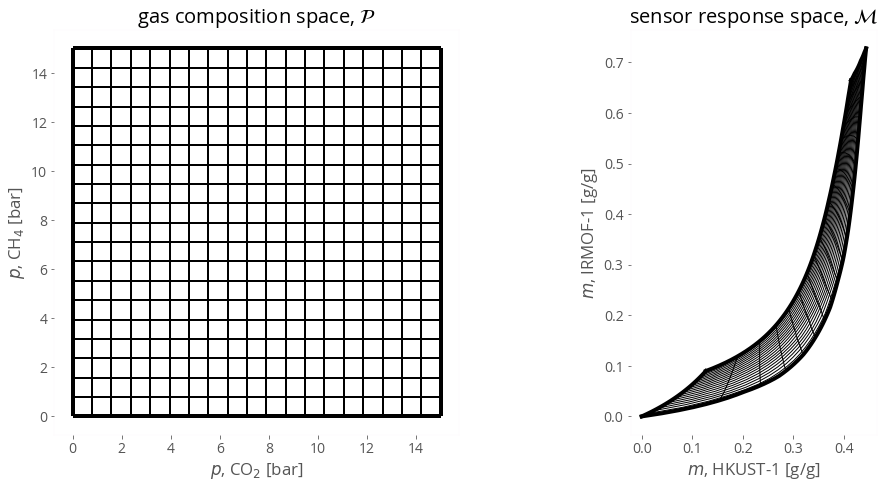

In [21]:
p_max = 15.0
draw_color = False

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# turn off grid.
for k in range(2):
    ax[k].grid(False)
    
###
#   composition space. color is uniform here.
###
ax[0].set_title("gas composition space, $\mathcal{P}$")
ax[0].set_xlabel("$p$, " + gas_to_label[gases[0]] + " [bar]")
ax[0].set_ylabel("$p$, " + gas_to_label[gases[1]] + " [bar]")

p = np.linspace(0, p_max, 100)
if draw_color:
    z = [[colorFromBivariateData(p_x / p_max, p_y / p_max) for p_x in p] for p_y in p]
    ax[0].imshow(z, extent=(0, p_max, 0, p_max), origin='lower')     
ax[0].set_aspect('equal', 'box')
draw_box(p_max, 0)

###
#   sensor response space
###
ax[1].set_title("sensor response space, $\mathcal{M}$")
ax[1].set_xlabel("$m$, " + mofs[0] + " [g/g]")
ax[1].set_ylabel("$m$, " + mofs[1] + " [g/g]")

# see how big we need to go in m.
#    look at corners
m_corners = [f(np.array([p_max, 0.0])), f(np.array([p_max, p_max])), f(np.array([0.0, p_max]))]
m0_max = np.max([m_corner[0] for m_corner in m_corners])
m1_max = np.max([m_corner[1] for m_corner in m_corners])

num_grid_pts = 150
m0_grid = np.linspace(0, m0_max, num_grid_pts)
m1_grid = np.linspace(0, m1_max, num_grid_pts)
if draw_color:
    z = [[colorFromBivariateData(np.nan, np.nan) for i in range(num_grid_pts)] for j in range(num_grid_pts)]

    da_real_thing = True
    if not da_real_thing:
        print("doing kNN inverse, not the real inverse!")
    for i in range(num_grid_pts):
        for j in range(num_grid_pts):
            m = np.array([m0_grid[i], m1_grid[j]])
            # use k-NN approx to the inverse to rule out points safely far from boundary
            if distance_to_nearest_neighbor(m) > 0.05:
                continue
    #         if np.any(p > 1.5 * p_max) or np.any(p < 0.0):
    #             continue
            # now do the real inverse
            if da_real_thing:
                p = g(m)
            else:
                p = g_knn(m)
            if np.any(np.isnan(p)):
                continue
            if np.all(p < p_max):
                z[j][i] = colorFromBivariateData(p[0] / p_max, p[1] / p_max)

    ax[1].imshow(z, extent=(0, m0_max, 0, m1_max),  origin='lower') 
ax[1].set_aspect('equal', 'box')

###
#  grid lines
###
nb_lines = 20
nb_pts = 50
ps = np.linspace(0, p_max, nb_lines)
p_fine = np.linspace(0, p_max, nb_pts)
for i in range(len(ps)):
    ###
    #   x = constant (vertical) grid lines
    ###
    p_a = ps[i] # p_a is constant here.
    ax[0].vlines(p_a, 0, p_max, color=grid_line_color)
    
    # plot the image of the line in sensor response space
    #     loop through points on the line
    m0 = np.zeros(nb_pts)
    m1 = np.zeros(nb_pts)
    for j, p_b in enumerate(p_fine):
        p = np.array([p_a, p_b])
        m0[j], m1[j] = f(p)
    ax[1].plot(m0, m1, color=grid_line_color, lw=1)
    
    ###
    #   y = constant (horizontal) grid lines
    ###
    p_b = ps[i] # p_b is constant here.
    ax[0].hlines(p_b, 0, p_max, color=grid_line_color)
    
    # plot the image of the line in sensor response space
    # loop through points on the line
    for j, p_a in enumerate(p_fine):
        p = np.array([p_a, p_b])
        m0[j], m1[j] = f(p)
    ax[1].plot(m0, m1, color=grid_line_color, lw=1)
# plt.suptitle("$f:\mathbf{p} \rightarrow \mathbf{m}$")
draw_mspace_boundaries(p_max, 1)
plt.tight_layout()
plt.savefig("p_to_m_2d.pdf", format="pdf")

# Mapping Response Space to Composition Space

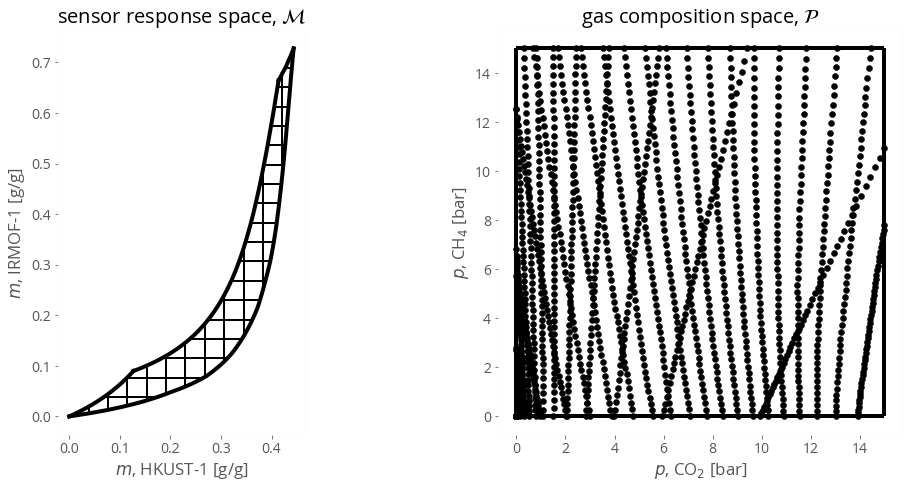

In [22]:
draw_color = False
draw_circles = False

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# turn off grid.
for k in range(2):
    ax[k].grid(False)
###
#   sensor response space
###
ax[0].set_title("sensor response space, $\mathcal{M}$")
ax[0].set_xlabel("$m$, " + mofs[0] + " [g/g]")
ax[0].set_ylabel("$m$, " + mofs[1] + " [g/g]")

if draw_color:
    z = [[colorFromBivariateData(m_0 / m0_max, m_1 / m1_max) for m_0 in m0_grid] for m_1 in m1_grid]
    # white out values outside of the boundary
    for i, m_0 in enumerate(m0_grid):
        for j, m_1 in enumerate(m1_grid):
            m = np.array([m_0, m_1])
            if distance_to_nearest_neighbor(m) > 0.05:
                z[j][i] = colorFromBivariateData(np.nan, np.nan)
                continue
            p = g(m)
            if np.any(p > p_max) or np.any(np.isnan(p)):
                z[j][i] = colorFromBivariateData(np.nan, np.nan)

    ax[0].imshow(z, extent=(0, m0_max, 0, m1_max), origin='lower')     
ax[0].set_aspect('equal', 'box')
draw_mspace_boundaries(p_max, 0)

###
#   composition space
###
ax[1].set_title("gas composition space, $\mathcal{P}$")
ax[1].set_xlabel("$p$, " + gas_to_label[gases[0]] + " [bar]")
ax[1].set_ylabel("$p$, " + gas_to_label[gases[1]] + " [bar]")
if draw_color:
    ps = np.linspace(0, p_max, 50)
    z = [[colorFromBivariateData(np.nan, np.nan) for p_x in ps] for p_y in ps]
    for i, p_x in enumerate(ps):
        for j, p_y in enumerate(ps):
            p = np.array([p_x, p_y])
            m = f(p)
            z[j][i] = colorFromBivariateData(m[0] / m0_max, m[1] / m1_max)
    ax[1].imshow(z, extent=(0, p_max, 0, p_max), origin='lower')     
ax[1].set_aspect('equal', 'box')
draw_box(p_max, 1)

###
#   cirlce of points
### 
circle_colors = ["C2", "C3", "C4", "C5"]
if draw_circles:
    r = 0
    for p_bar in [np.array([1, 10]), np.array([5, 15]), np.array([10, 20]), np.array([12, 17.])]:
        m_bar = f(p_bar)
        ax[0].scatter([m_bar[0]], [m_bar[1]], color=circle_colors[r], marker="X")
        ax[1].scatter([p_bar[0]], [p_bar[1]], color=circle_colors[r], marker="X")

        thetas = np.linspace(0, 2*np.pi, 30)
        dm = 0.02
        ms = [m_bar + dm * np.array([np.cos(theta), np.sin(theta)]) for theta in thetas]
        ps = [g(m) for m in ms]
        for i in range(len(thetas)-1):
            ax[0].plot([ms[i][0], ms[i+1][0]], [ms[i][1], ms[i+1][1]], color=circle_colors[r])
            ax[1].plot([ps[i][0], ps[i+1][0]], [ps[i][1], ps[i+1][1]], color=circle_colors[r])
        r += 1
###
#  grid lines
###
nb_lines = 20
nb_pts = 50
ms = np.linspace(0, np.max([m0_max, m1_max]), nb_lines)

###
#   vertical lines.
#   m_0 known. what is [m_1_start, m_1_end]?
m_top_left = f(np.array([0.0, p_max]))
m_top_right = f(np.array([p_max, p_max])) # def related to comp space not resp space
# bottom of vert line: p_1 = 0. wut is p_0?
def get_m1_start(m_0):
    # wut pressure of gas 0 gives this m_0? look at pure-component of gas 0 in mof 0
    def f_want_0(p_0):
        return ads_model[mofs[0]][gases[0]].loading(p_0) * molecular_weight[gases[0]] / 1000 - m_0
    p_0 = optimize.root_scalar(f_want_0, bracket=[0, p_max]).root # x[0]
    # retrun m_1 at this p_0
    return ads_model[mofs[1]][gases[0]].loading(p_0) * molecular_weight[gases[0]] / 1000

# top of vert line: p_1 = p_max. wut is p_0?
def get_m1_end(m_0):
    if m_0 < m_top_left[0]: # p = [0.0, p_1] for some p_1
        # wut pressure of gas 0 gives this m_0? look at pure-component of gas 0 in mof 0
        def f_want_0(p_1):
            p = np.array([0.0, p_1])
            return f(p)[0] - m_0
        p_1 = optimize.root(f_want_0, p_max * m_0 / 0.5).x[0]
        p = np.array([0.0, p_1])
        return f(p)[1]
    elif m_0 > m_top_right[0]: # p_0 = p_max
        def f_want_0(p_1):
            p = np.array([p_max, p_1])
            return f(p)[0] - m_0
        p_1 = optimize.root(f_want_0, p_max * m_0 / 0.5).x[0]
        p = np.array([p_max, p_1])
        return f(p)[1]
    else:  # p = [p_0, p_max]
        # wut pressure of gas 0 gives this m_0? look at pure-component of gas 0 in mof 0
        def f_want_0(p_0):
            p = np.array([p_0, p_max])
            return f(p)[0] - m_0
        p_0 = optimize.root(f_want_0, p_max * m_0 / 0.4).x[0]
        p = np.array([p_0, p_max])
        return f(p)[1]
###
#   horizontal lines.
#   m_1 known. what is [m_0_start, m_0_end]?

# left of horiz line: p_0 = 0. wut is p_1?
def get_m0_start(m_1):
    if m_1 < m_top_left[1]:
        # wut pressure of gas 1 gives this m_1? look at pure-component of gas 1 in mof 1
        def f_want_0(p_1):
            return ads_model[mofs[1]][gases[1]].loading(p_1) * molecular_weight[gases[1]] / 1000 - m_0
        p_1 = optimize.root(f_want_0, p_max).x[0]
        # retrun m_0 at this p_1
        return ads_model[mofs[0]][gases[1]].loading(p_1) * molecular_weight[gases[1]] / 1000
    elif m_1 > m_top_right[1]:
        # p0 = pmax is all we kno
        def f_want_0(p_1):
            p = np.array([p_max, p_1])
            return f(p)[1] - m_1
        p_1 = optimize.root(f_want_0, p_max/2).x[0]
        p = np.array([p_max, p_1])
        return f(p)[0]
    else:
        # p_1 = p_max, gotta find p_0
        def f_want_0(p_0):
            p = np.array([p_0, p_max])
            return f(p)[1] - m_1
        p_0 = optimize.root(f_want_0, p_max).x[0]
        p = np.array([p_0, p_max])
        return f(p)[0]

# right of horiz line for fixed m1
def get_m0_end(m_1):
    # p_1 = 0.0. wut is p_0?
    def f_want_0(p_0):
        p = np.array([p_0, 0.0])
        return f(p)[1] - m_1
    p_0 = optimize.root(f_want_0, p_max).x[0]
    p = np.array([p_0, 0.0])
    return f(p)[0]

p_0 = np.zeros(nb_pts)
p_1 = np.zeros(nb_pts)
for i in range(nb_lines):
    ###
    #   x = constant (vertical) grid lines
    ###
    m_0 = ms[i] # m_0 is constant here.
    if m_0 < m0_max:
        m1_start, m1_end = get_m1_start(m_0), get_m1_end(m_0)
        ax[0].vlines(m_0, m1_start, m1_end, color=grid_line_color)

        # plot the image of the line in sensor response space
        #     loop through points on the line
        m_1s = np.linspace(m1_start, m1_end, nb_pts)
        for j, m_1 in enumerate(m_1s):
            m = np.array([m_0, m_1])
            p_0[j], p_1[j]  = g(m)
            if np.isnan(p_0[j]) or np.isnan(p_1[j]):
                p_0[j], p_1[j] = g_knn(m)
                print("resorting to knn for ", m)
                print("\tgot p = ", g_knn(m))
        ax[1].scatter(p_0, p_1, color=grid_line_color)

    ###
    #   y = constant (horizontal) grid lines
    ###
    m_1 = ms[i] # m_1 is constant here.
    if m_1 < m1_max:
        m0_start, m0_end = get_m0_start(m_1), get_m0_end(m_1)
    
        # TODO find m0 start, end
        ax[0].hlines(m_1, m0_start, m0_end, color=grid_line_color)

        # plot the image of the line in sensor response space
        # loop through points on the line
        m_0s = np.linspace(m0_start, m0_end, nb_pts)
        for j, m_0 in enumerate(m_0s):
            m = np.array([m_0, m_1])
            p_0[j], p_1[j] = g(m)
            if np.isnan(p_0[j]) or np.isnan(p_1[j]):
                p_0[j], p_1[j] = g_knn(m)
                print("resorting to knn for ", m)
                print("\tgot p = ", g_knn(m))
        ax[1].scatter(p_0, p_1, color=grid_line_color)
        
plt.tight_layout()
# plt.savefig("m_to_p_2d.pdf", format="pdf")

# Conditionining

In [23]:
import numdifftools as nd

J_f = nd.Jacobian(f) # a function!

In [24]:
def condition_no(p):
    j = J_f(p) # Jacobian of f(p) at p
    return 1 / np.min(np.linalg.svd(j)[1]) # operator norm of inverse of j = J_g(m)

In [ ]:
ps = np.linspace(0.01, p_max, 25)
z = [[condition_no(np.array([p_x, p_y])) for p_x in ps] for p_y in ps]

plt.figure()
plt.title("condition number, $\\xi$")
plt.xlabel("$p$, " + gas_to_label[gases[0]] + " [bar]")
plt.ylabel("$p$, " + gas_to_label[gases[1]] + " [bar]")
plt.imshow(z, origin="lower", extent=(0, p_max, 0, p_max))